Continuous-time model
---

Let's order the infection times $t_{\pi_{1}}<t_{\pi_{2}}<\dots<t_{\pi_{N}}$
. Let $\lambda_{i}\left(t\right)$ be a time-dependent transmission
rate and $L_{i}\left(t\right)=\int_{0}^{t}\lambda_{ij}\left(s\right)ds$
its primitive. Then $\rho_{i}\left(t_i; t_j\right)=\lambda_{i}\left(t_i\right)e^{-\int_{t_j}^{t_i}\lambda_{i}\left(s\right)ds} = \lambda_{i}\left(t_j\right)e^{L_{i}(t_j) - L_{i}(t_i) }$
will be the transmission ``delay'' density distribution. 

\begin{align*}p\left(t_{1},\dots,t_{N}\right) & =\prod_{i=1}^{N}\lim_{ds\to0^{+}}\frac{\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}-\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}}{ds}\\
 & =\prod_{i=1}^{N}\frac{d}{ds}_{|s=0}\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}\\
 & =\prod_{i=1}^{N}\left\{ \left(\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}\right)\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right\} \\
\mathcal{L}_{0}\left(t_{1},\dots,t_{N}\right) & =\log p\left(t_{1},\dots,t_{N}\right)\\
 & =-\sum_{i=1}^{N}\left\{ \sum_{j\in\partial i:t_{j}<t_{i}}\left(L_{i}(t_{i})-L_{i}(t_{j})\right)-\log\left(\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right)\right\} 
\end{align*}

Note that $$\int_{t_j}^{t_i} \rho_{i}(s; t_j) ds = 1-e^{-\left(L_{i}(t_i) - L_{i}(t_j)\right)}$$ so $$\lambda_{i}(t) = -\frac{d}{dt}\log \left(1-\int_{t_j}^{t_i} \rho_{i}(s) ds\right)$$


\begin{align}\lambda(t) & =ae^{-\left(\frac{t-b}{c}\right)^{2}}\\
\frac{x-b}{c} & =\frac{y}{\sqrt{2}}\\
dx & =\frac{c}{\sqrt{2}}dy\\
L(t)=\int_{0}^{t}ae^{-\left(\frac{x-b}{c}\right)^{2}}dx & = ac\int_{\frac{0-b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =ac\sqrt{\pi}\frac{1}{\sqrt{\pi}}\int_{-\frac{b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =\frac{ac\sqrt{\pi}}{2}\left(\mathrm{erfc}\left(-\frac{t-b}{c}\right)-\mathrm{erfc}\left(\frac{b}{c}\right)\right)\\
\rho_{i}\left(t_{i};t_{j}\right) & =\lambda_{i}\left(t_{i}\right)e^{-\int_{t_{j}}^{t_{i}}\lambda_{i}\left(s\right)ds}=\lambda_{i}\left(t_{i}\right)e^{L_{i}(t_{j})-L_{i}(t_{i})}\\
\frac{d}{ds}-e^{L_{i}(t_{j})-L_{i}(s)} & =\lambda\left(s\right)e^{L_{i}(t_{j})-L_{i}(s)}=\rho_{i}\left(s;t_{j}\right)\\
\end{align}

Sampling 
---
\begin{align}
\int_{t_{j}}^{t}\rho(s;t_{j})ds & =1-e^{L_{i}(t_{j})-L_{i}(t)}=1-r\sim U(0,1)\\
e^{L_{i}(t_{j})-L_{i}(t)} & =r\\
L_{i}(t) & =L_{i}\left(t_{j}\right)-\log(r)\\
\mathrm{erfc}\left(-\frac{t-b}{c}\right) & =\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\\
t & =-c\,\mathrm{ierfc}\left(\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\right)+b
\end{align}

In [103]:
using Causality
using IntervalUnionArithmetic

In [181]:
using SparseArrays, LinearAlgebra
T, N = 20.0, 50
ρ = 0.
G = Causality.makeGNP(N,ρ)

Causality.SparseMatrixDiGraph{Int64}(sparse(Int64[], Int64[], Irrational{:π}[], 50, 50), sparse(Int64[], Int64[], Int64[], 50, 50))

In [182]:
getpargen(inf_out::GaussianRate, lat_gen::GaussianRate, rec_gen::GaussianRate) = 
    [inf_out.a inf_out.b inf_out.c lat_gen.a lat_gen.b lat_gen.c rec_gen.a rec_gen.b rec_gen.c]


getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate, latency::GaussianRate, recov::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
     fill(latency.a, 1, N); fill(latency.b, 1, N); fill(latency.c, 1, N);
     fill(recov.a, 1, N); fill(recov.b, 1, N); fill(recov.c, 1, N)
    ]

getpar (generic function with 1 method)

In [185]:
#Initialize generation parameters
ε = 1e-10
λ = 0.6
pseed = 10/N 
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
latency = GaussianRate(1., T/2, 1/ε)
recov = GaussianRate(1., T/2, 1/ε)

inf_out = GaussianRate(λ, 4., 3.)
l_delay = GaussianRate(0.8, 2., 3.)
r_delay = GaussianRate(0.1, 6., 4.)

θp = getpar(pseed, autoinf, inf_in, latency, recov);
θpgen = getpargen(inf_out, l_delay, r_delay);

In [186]:
θpgen

1×9 Matrix{Float64}:
 0.6  4.0  3.0  0.8  2.0  3.0  0.1  6.0  4.0

In [187]:
#Initialize min/max boundaies
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min, rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max, rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(3.  ,  T,   T)

θgenmin = getpargen(rate_min, rate_min, rate_min);
θgenmax = getpargen(rate_max, rate_max, rate_max);

In [188]:
const I = IndividualSEIR{GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate}

IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}

In [189]:
Mp = StochasticModel(I, T, θp, G, θpgen);
sample! = Sampler(Mp);

In [192]:
xtrue = zeros(N,3)
sample!(xtrue)
nobs, p = 50, 1e-6
O = [(ti = T*(1+rand())/2; (i,xtrue[i,2] < ti < xtrue[i,3],ti,p)) for i=1:nobs]

50-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 1, 15.287103156199308, 1.0e-6)
 (2, 0, 12.795444012766248, 1.0e-6)
 (3, 0, 12.169961136962035, 1.0e-6)
 (4, 0, 17.67190720975345, 1.0e-6)
 (5, 0, 13.898376336446825, 1.0e-6)
 (6, 0, 16.181315019052136, 1.0e-6)
 (7, 0, 11.188157994650707, 1.0e-6)
 (8, 0, 18.18425097904264, 1.0e-6)
 (9, 0, 13.428975042437465, 1.0e-6)
 (10, 0, 18.953263419683562, 1.0e-6)
 (11, 0, 11.736494011160264, 1.0e-6)
 (12, 0, 12.016653848488692, 1.0e-6)
 (13, 0, 15.666304784989226, 1.0e-6)
 ⋮
 (39, 0, 15.701447172686894, 1.0e-6)
 (40, 0, 15.274510741395403, 1.0e-6)
 (41, 1, 19.958115821984634, 1.0e-6)
 (42, 0, 12.313355800746063, 1.0e-6)
 (43, 0, 11.431218985206236, 1.0e-6)
 (44, 0, 15.259850795538272, 1.0e-6)
 (45, 0, 13.421581248822836, 1.0e-6)
 (46, 1, 16.558151046998816, 1.0e-6)
 (47, 0, 12.185949111685655, 1.0e-6)
 (48, 1, 18.41866928354786, 1.0e-6)
 (49, 0, 16.228995867761977, 1.0e-6)
 (50, 0, 15.790200420131022, 1.0e-6)

In [194]:
#Initialize softened model
T = Float64(T)
ε = 2e-3

inf_out = GaussianRate(0.1, 7., 6.)
l_delay = GaussianRate(1/2, 7., 5.)
r_delay = GaussianRate(1/2, 4., 4.)

autoinf = GaussianRate(ε, T/2, 1/ε)

θp2gen = getpargen(inf_out, l_delay, r_delay);
θp2 = getpar(pseed, autoinf, inf_in, latency, recov);
Mp2 = StochasticModel(I, T, θp2, G, θpgen);

In [170]:
θpgen

1×9 Matrix{Float64}:
 0.6  4.0  3.0  0.8  2.0  3.0  0.1  6.0  4.0

In [171]:
θp2gen

1×9 Matrix{Float64}:
 0.1  7.0  6.0  0.5  7.0  5.0  0.5  4.0  4.0

In [173]:
#Initialize the parameters to learn

autoinf = GaussianRate(1/N, T/2, 2T)
inf_in = GaussianRate(1.0, T/2, 2T)
latency = GaussianRate(1., T/2, 2T)
recov = GaussianRate(1., T/2, 2T)


θ = getpar(pseed, autoinf, inf_in,  latency, recov);
M = StochasticModel(I, T, θp2, G, θpgen);

In [174]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
descend!(Mp2, O; M=M, numsamples=1000, numiters=200, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.),
         hyperdescender=SignDescender(0.01),learnhyper=1);
#descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
 #        θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.03));

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:13
  F:  0.0

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
     [1] [0m[1mForwardDiff.GradientConfig[22m[0m[1m([22m[90mf[39m::[0mCausality.var"#31#32"[90m{Matrix{Float64}, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Int64}[39m, [90mx[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m[0m[1m)[22m
    [90m   @ [39m[35mForwardDiff[39m [90m~/.julia/packages/ForwardDiff/tZ5o1/src/[39m[90m[4mconfig.jl:121[24m[39m
     [2] [0m[1mgradient![22m[0m[1m([22m[90mresult[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mf[39m::[0mCausality.var"#31#32"[90m{Matrix{Float64}, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Int64}[39m, [90mx[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m[0m[1m)[22m
    [90m   @ [39m[35mForwardDiff[39m [90m~/.julia/packages/ForwardDiff/tZ5o1/src/[39m[90m[4mgradient.jl:35[24m[39m
     [3] [0m[1mgradient![22m[0m[1m([22m[90mdθ[39m::[0mMatrix[90m{Float64}[39m, [90mx[39m::[0mMatrix[90m{Float64}[39m, [90mM[39m::[0mStochasticModel[90m{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}[39m[0m[1m)[22m
    [90m   @ [39m[36mCausality[39m [90m~/git/Causality/src/[39m[90m[4mvariation.jl:131[24m[39m
     [4] [0m[1mmacro expansion[22m
    [90m   @ [39m[90m~/git/Causality/src/[39m[90m[4mvariation.jl:106[24m[39m[90m [inlined][39m
     [5] [0m[1m(::Causality.var"#149#threadsfor_fun#180"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Int64, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Vector{Tuple{Int64, Any, Any, Any}}, Matrix{Float64}, Vector{Causality.var"#sample!#35"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Causality.var"#updateQ!#34"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, Vector{Int64}, Int64}}, Vector{Float64}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[36mCausality[39m [90m[4mthreadingconstructs.jl:85[24m[39m
     [6] [0m[1m(::Causality.var"#149#threadsfor_fun#180"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Int64, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Vector{Tuple{Int64, Any, Any, Any}}, Matrix{Float64}, Vector{Causality.var"#sample!#35"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Causality.var"#updateQ!#34"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, Vector{Int64}, Int64}}, Vector{Float64}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[36mCausality[39m [90m[4mthreadingconstructs.jl:52[24m[39m

In [175]:
println(round.(θp2gen,digits=4))

[0.1 7.0 6.0 0.5 7.0 5.0 0.5 4.0 4.0]


In [176]:
println(round.(θpgen,digits=3))

[2.273 0.817 13.076 2.532 3.917 5.533 0.2 5.835 3.52]


In [161]:
θpgen

1×9 Matrix{Float64}:
 0.0734356  1.22851  6.4121  0.155106  …  1.43066  0.158339  5.9973  10.6534

In [162]:
θ

13×50 Matrix{Float64}:
  0.0197921     0.0201919     0.0201919   …   0.0197921    0.0201919
  0.00202426    0.00198418    0.00198418      0.00202426   0.00202426
 10.9368       11.6132       10.2999         13.3584      11.8478
 99.3312      103.385       103.385          93.5464      89.8783
  1.0096        0.989604      0.989604        0.989604     0.989604
 10.2999        9.508         9.89604     …   9.89604     10.508
 37.2789       43.7474       38.032          40.3838      42.032
  1.0096        0.989604      0.989604        1.0096       1.0096
  9.89604       9.70008       9.89604         9.89604      9.89604
 40.3838       40.3838       38.8003         42.032       40.3838
  1.0096        1.0096        0.989604    …   1.0096       0.989604
  9.89604      10.2999        9.89604         9.508       10.2999
 41.1997       38.032        39.5841         40.3838      43.7474

In [166]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [167]:
stats = post(Mp, O, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:15


In [168]:
statscau = prior(M);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


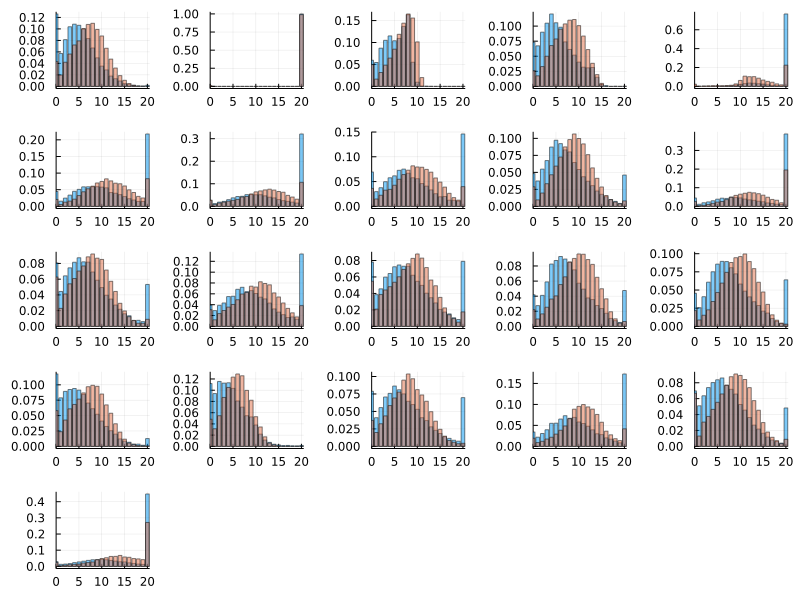

In [175]:
using Plots
state = 1
pl = map(1:21) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[:, k, state]), up=M.T), alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="cau", legend=false);
    bar!(p, 0:M.T/20:M.T, histo((@view stats[:, k, state]), up=M.T),    alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="true", legend=false);
end;
savefig("marginals.pdf")
plot(pl..., size=(800,600))

## Marginals and ROC curve

In [170]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum( stats[:,i,2] .< t .< stats[:,i,3] ) / numsamp
end

function tpr(xtrue, rank) 
    den = sum(xtrue[rank])
    if den != 0
        return cumsum(xtrue[rank]) ./ den
    else
        return ones(size(rank))
    end
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

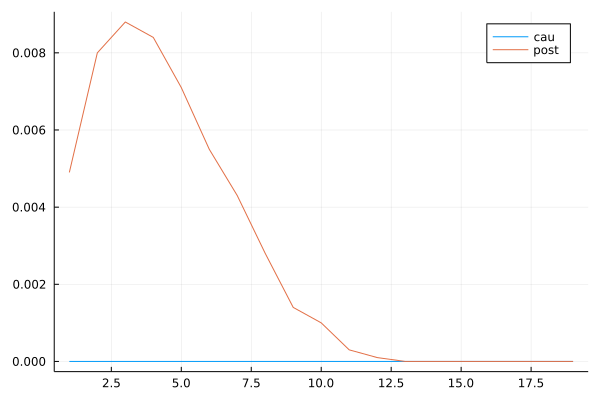

In [171]:
using Plots
p_cau = zeros(N,Int(T))
p_exact = zeros(N,Int(T))
for i = 1:N
    for t = 1:Int(T)
       p_cau[i,t] = marginal(i, t, statscau)
       p_exact[i,t] = marginal(i, t, stats)
    end
end
i = 2
plot(p_cau[i,1:end-1], label = "cau")
plot!(p_exact[i,1:end-1], label = "post")

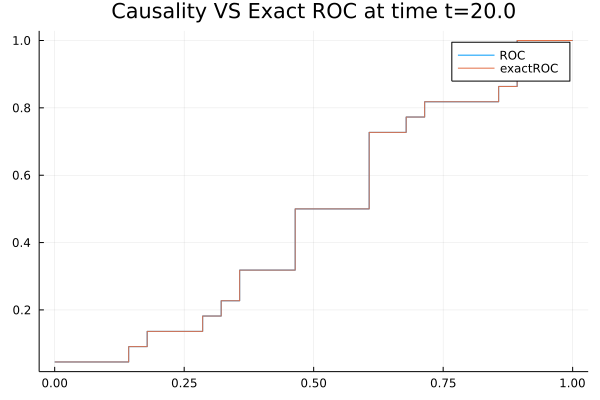

In [172]:
#Let us find the ROC of the infected individuals at time t
t = T
epidemic_risk=zeros(N)
true_risk=zeros(N)
for i=1:N
   epidemic_risk[i] = marginal(i,t,statscau)
   true_risk[i] = marginal(i,t,stats)
end
xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
plot(ROC(xt, epidemic_risk)[1],ROC(xt, epidemic_risk)[2], label="ROC", title="Causality VS Exact ROC at time t=$t")
plot!(ROC(xt, true_risk)[1],ROC(xt, true_risk)[2], label="exactROC")

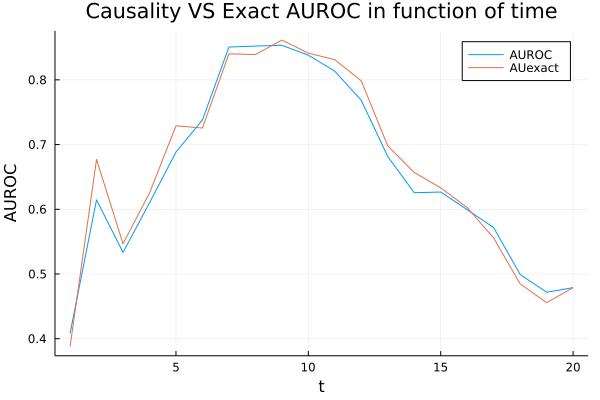

In [174]:
T = Int(T)
AU_curve=zeros(T)
AU_exact=zeros(T)
for t = 1:T
    epidemic_risk=zeros(N)
    true_risk=zeros(N)
    for i=1:N
       epidemic_risk[i] = marginal(i,t,statscau)
       true_risk[i] = marginal(i,t,stats)
    end
    xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
    AU_curve[t] = AUROC(ROC(xt, epidemic_risk))
    AU_exact[t] = AUROC(ROC(xt, true_risk))
end

plot(LinRange(1,T,T),AU_curve, label="AUROC", title="Causality VS Exact AUROC in function of time")
plot!(LinRange(1,T,T),AU_exact, label="AUexact")
T = Float64(T)
savefig("SEIR_AUROC.pdf")
xlabel!("t")
ylabel!("AUROC")